In [73]:
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from WeatherAPI import Weather
from config import PATH_DATASET

In [6]:
data = pd.read_csv(PATH_DATASET)
data

,Unnamed: 0,datesk,Item Name,Date,price
0,296,20110101,Sponge Gourd,2011-01-01,32
1,22311,20110309,Berry Southafrica,2011-09-03,0
2,22312,20110309,Baby corn cleaned,2011-09-03,56
3,22313,20110309,Baby corn,2011-09-03,14
4,22314,20110309,Chillies Bajji yagani,2011-09-03,0
...,...,...,...,...,...
551943,868958,20180227,Cherry fruit,2018-02-27,150
551944,868960,20180227,Komark fruit,2018-02-27,28
551945,868961,20180227,Dry dates,2018-02-27,20
551946,868962,20180227,Tamarind seedless,2018-02-27,230


In [3]:
data.isna().sum()

,datesk,Item Name,Date,price    0
dtype: int64

In [ ]:
data = data[data['Item Name'].isna() == False]
data

In [ ]:
data.isna().sum()

datesk            0
Item Name         0
Date              0
price        309178
dtype: int64

In [ ]:
data = data[data['price'].isna() == False]
data

,datesk,Item Name,Date,price
296,20110101,Sponge Gourd,01.01.2011,32
22311,20110309,Berry Southafrica,03.09.2011,0
22312,20110309,Baby corn cleaned,03.09.2011,56
22313,20110309,Baby corn,03.09.2011,14
22314,20110309,Chillies Bajji yagani,03.09.2011,0
...,...,...,...,...
868958,20180227,Cherry fruit,27/02/2018,150
868960,20180227,Komark fruit,27/02/2018,28
868961,20180227,Dry dates,27/02/2018,20
868962,20180227,Tamarind seedless,27/02/2018,230


In [ ]:
data.isna().sum()

datesk       0
Item Name    0
Date         0
price        0
dtype: int64

In [ ]:
print(data.Date.iloc[0])

01.01.2011


In [ ]:
d = re.search(pattern=r'(?P<day>\d{2}).(?P<month>\d{2}).(?P<year>\d{4})', string=data.Date.iloc[0])
print('{year}-{month}-{day}'.format(year=d.groupdict()['year'], month=d.groupdict()['month'], day=d.groupdict()['day']))

2011-01-01


In [ ]:
def map_fuction_date_prcossing(x):
    d = re.search(pattern=r'(?P<day>\d{2}).(?P<month>\d{2}).(?P<year>\d{4})', string=x)
    return '{year}-{month}-{day}'.format(year=d.groupdict()['year'], month=d.groupdict()['month'], day=d.groupdict()['day'])

data.Date = data.Date.map(map_fuction_date_prcossing)

In [ ]:
data.isna().sum()

datesk       0
Item Name    0
Date         0
price        0
dtype: int64

In [ ]:
data

,datesk,Item Name,Date,price
296,20110101,Sponge Gourd,2011-01-01,32
22311,20110309,Berry Southafrica,2011-09-03,0
22312,20110309,Baby corn cleaned,2011-09-03,56
22313,20110309,Baby corn,2011-09-03,14
22314,20110309,Chillies Bajji yagani,2011-09-03,0
...,...,...,...,...
868958,20180227,Cherry fruit,2018-02-27,150
868960,20180227,Komark fruit,2018-02-27,28
868961,20180227,Dry dates,2018-02-27,20
868962,20180227,Tamarind seedless,2018-02-27,230


In [36]:
weather_data = pd.read_csv(r"D:\Datasets\weather\export.csv", usecols=[0, 1, 2, 3])

In [37]:
weather_data

,date,tavg,tmin,tmax
0,2011-01-01,21.9,16.8,29.0
1,2011-01-02,22.2,18.1,29.0
2,2011-01-03,21.2,NaN,28.9
3,2011-01-04,21.1,16.6,27.3
4,2011-01-05,21.1,17.1,27.3
...,...,...,...,...
2583,2018-01-27,21.4,16.0,29.0
2584,2018-01-28,21.9,14.0,28.2
2585,2018-01-29,22.0,16.0,29.2
2586,2018-01-30,21.5,15.7,29.5


In [38]:
weather_data.isna().sum()

date     0
tavg     0
tmin    77
tmax     3
dtype: int64

In [39]:
weather_data = weather_data[weather_data.tmin.isna() == False]

In [40]:
weather_data.isna().sum()

date    0
tavg    0
tmin    0
tmax    2
dtype: int64

In [41]:
weather_data = weather_data[weather_data.tmax.isna() == False]

In [42]:
weather_data

,date,tavg,tmin,tmax
0,2011-01-01,21.9,16.8,29.0
1,2011-01-02,22.2,18.1,29.0
3,2011-01-04,21.1,16.6,27.3
4,2011-01-05,21.1,17.1,27.3
5,2011-01-06,21.4,17.2,27.4
...,...,...,...,...
2583,2018-01-27,21.4,16.0,29.0
2584,2018-01-28,21.9,14.0,28.2
2585,2018-01-29,22.0,16.0,29.2
2586,2018-01-30,21.5,15.7,29.5


In [45]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [47]:
data.drop(columns=['datesk'], inplace=True)

In [91]:
data['Item Name'].nunique()

330

In [51]:
data_sponge_gourd = data[data['Item Name'] == 'Sponge Gourd']

,Item Name,Date,price
0,Sponge Gourd,2011-01-01,32
43,Sponge Gourd,2011-09-03,32
620,Sponge Gourd,2011-10-03,32
948,Sponge Gourd,2011-03-14,32
1291,Sponge Gourd,2011-03-16,32
...,...,...,...
550798,Sponge Gourd,2018-02-22,36
551080,Sponge Gourd,2018-02-23,36
551344,Sponge Gourd,2018-02-24,37
551617,Sponge Gourd,2018-02-26,39


In [53]:
data_sponge_gourd.Date.value_counts()

2017-07-20    1
2013-12-28    1
2011-09-08    1
2016-01-01    1
2012-04-13    1
             ..
2016-11-11    1
2015-10-30    1
2015-01-22    1
2011-10-11    1
2014-09-09    1
Name: Date, Length: 2013, dtype: int64

In [54]:
weather_data.date.value_counts()

2016-10-28    1
2015-11-01    1
2013-12-12    1
2016-01-15    1
2015-03-27    1
             ..
2017-12-14    1
2014-11-04    1
2012-08-24    1
2012-11-16    1
2014-09-09    1
Name: date, Length: 2509, dtype: int64

In [68]:
r = data_sponge_gourd.join(weather_data.set_index('date'), on='Date')

In [69]:
mask = r[r.tavg.isna() == True]
r.drop(index=mask.index, inplace=True)

In [71]:
r.isna().sum()

Item Name    0
Date         0
price        0
tavg         0
tmin         0
tmax         0
dtype: int64

In [72]:
r

,Item Name,Date,price,tavg,tmin,tmax
0,Sponge Gourd,2011-01-01,32,21.9,16.8,29.0
43,Sponge Gourd,2011-09-03,32,22.6,19.8,27.6
620,Sponge Gourd,2011-10-03,32,22.9,20.2,29.2
948,Sponge Gourd,2011-03-14,32,26.0,18.9,33.1
1291,Sponge Gourd,2011-03-16,32,25.8,19.5,33.2
...,...,...,...,...,...,...
544790,Sponge Gourd,2018-01-27,25,21.4,16.0,29.0
545063,Sponge Gourd,2018-01-29,25,22.0,16.0,29.2
545349,Sponge Gourd,2018-01-30,26,21.5,15.7,29.5
545608,Sponge Gourd,2018-01-31,28,21.4,15.0,29.2


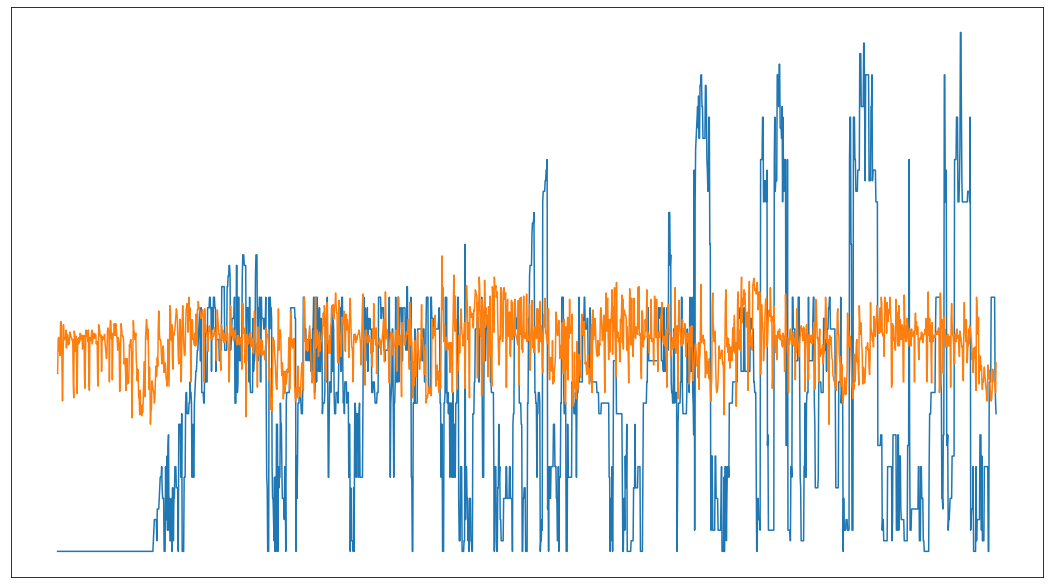

In [92]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True) 
# x = Date \ y = price
ax.plot(r['Date'], r['price'])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# x = Date \ y = tavg
ax.plot(r['Date'], r['tmin'])